<h1 style="color: red; text-align: center;"> Tarea 2 </h1>
<h3 style="color: red; text-align: center;"> Por: Guillermo De Mendoza </h3>
<h3 style="color: red; text-align: center;"> Materia: Mineria de datos </h3>

### Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

### Obtener y limpiar el set de datos

In [2]:
FOLDER ='C:\\data'
FILES = [
    ["ColombiaCB-5March21.csv","Colombia"],
    ["ChileCB-5March21.csv","Chile"],
    ["BrazilCB-5March21.csv","Brazil"],
    ["ArgentinaCB-5March21.csv","Argentina"],
    ["MexicoCB-5March21.csv","Mexico"],
    ["UruguayCB-5March21.csv","Uruguay"],
    ["SpainCB-5March21.csv","Spain"],
    ["SwitzerlandCB-5March21.csv","Switzerland"],
    ["IsraelCB-5March21.csv","Israel"],
    ["USACB-5March21.csv","USA"],
    ["GermanyCB-5March21.csv","Germany"]
]

countries_data_frames_list = []
data_countries_names = []
for file in FILES:
    #read folder and create dataframe
    file_path = FOLDER+"\\"+file[0]
    df = pd.read_csv(file_path)
    #add column country,city,state
    df["Country"] = file[1]
    df["City"]=""
    df["State"]=""
    #add country dataframe to countries_data_frames list
    countries_data_frames_list.append(df)
    #add country name to data_countries_names list
    data_countries_names.append(file[1])
    
# agregar valores de ciudades y estados
for df_index in range(len(countries_data_frames_list)):
    data_frame = countries_data_frames_list[df_index]
    for i in range(len(data_frame)):
        headQuartersLocationArray = data_frame.iloc[i]["Headquarters Location"].split(",")
        organizationName = data_frame.iloc[i]["Organization Name"]
        city = headQuartersLocationArray[0].strip()
        state = headQuartersLocationArray[1].strip()
        data_frame.at[i, 'City'] = city
        data_frame.at[i, 'State'] = state
    
dataframe_countries = pd.concat(countries_data_frames_list)

### Limpiar valores NaN por columna

In [3]:
#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
dataframe_countries = dataframe_countries[dataframe_countries["Last Funding Amount"].notna()]
dataframe_countries["Last Funding Amount"] = dataframe_countries["Last Funding Amount"].astype(int)

### Visualizar campos

In [4]:
print("Filas: %d"%(dataframe_countries.shape[1]))
print("Columnas: %d"%(dataframe_countries.shape[0]))

Filas: 106
Columnas: 6647


In [5]:
dataframe_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6647 entries, 0 to 999
Columns: 106 entries, Organization Name to State
dtypes: float64(28), int32(1), object(77)
memory usage: 5.4+ MB


In [6]:
dataframe_countries.head(5)

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,...,IPqwery - Trademarks Registered,IPqwery - Most Popular Patent Class,IPqwery - Most Popular Trademark Class,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),School Method,Country,City,State
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...","Medellín, Antioquia, Colombia",La Haus is a residential marketplace used to h...,"1,457",Latin America,$1M to $10M,Active,2017-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Medellín,Antioquia
1,Elenas,https://www.crunchbase.com/organization/elenas,"Beauty, Cosmetics, Direct Sales, E-Commerce","Bogotá, Distrito Especial, Colombia",Elenas is a Latin American social commerce pla...,"2,462",Latin America,NaN,Active,2018-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Bogotá,Distrito Especial
2,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,"Bogotá, Distrito Especial, Colombia",Get what you want giving what you have,"3,109",Latin America,NaN,Active,2019-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Bogotá,Distrito Especial
4,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech","Bogotá, Distrito Especial, Colombia",Aflore is a developer of tech-enabled direct s...,"3,449",Latin America,$1M to $10M,Active,2012-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Bogotá,Distrito Especial
5,Backstartup,https://www.crunchbase.com/organization/backst...,"Accounting, Financial Services, Small and Medi...","Bogotá, Distrito Especial, Colombia",SwaS (Software with a services) that automates...,"3,607",Latin America,Less than $1M,Active,2014-09-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Colombia,Bogotá,Distrito Especial


### Calculo de correlaciones

In [7]:
dataframe_countries.corr(method='pearson')

,Number of Lead Investments,Number of Exits,Number of Exits (IPO),Accelerator Duration (in weeks),Number of Founders,Number of Funding Rounds,Last Funding Amount,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency (in USD),...,Money Raised at IPO,Money Raised at IPO Currency (in USD),Valuation at IPO,Valuation at IPO Currency (in USD),Number of Events,BuiltWith - Active Tech Count,Apptopia - Number of Apps,G2 Stack - Total Products Active,Aberdeen - IT Spend,Aberdeen - IT Spend Currency (in USD)
Number of Lead Investments,1.000000,0.955582,0.955582,-0.755929,0.147350,-0.016875,-0.015908,-0.026802,-0.020128,-0.019810,...,0.124478,0.127796,0.124169,0.127151,0.380228,-0.038538,0.092966,0.262860,-0.039137,-0.039137
Number of Exits,0.955582,1.000000,1.000000,-0.693375,0.143803,-0.030508,0.011922,-0.043166,-0.032710,-0.031941,...,0.037420,0.041621,0.015687,0.018880,0.408581,0.021965,0.088955,0.247910,-0.032250,-0.032250
Number of Exits (IPO),0.955582,1.000000,1.000000,-0.693375,0.143803,-0.030508,0.011922,-0.043166,-0.032710,-0.031941,...,0.037420,0.041621,0.015687,0.018880,0.408581,0.021965,0.088955,0.247910,-0.032250,-0.032250
Accelerator Duration (in weeks),-0.755929,-0.693375,-0.693375,1.000000,NaN,0.654654,-0.981981,-0.981981,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.998778,-0.938959,1.000000,0.041204,NaN,NaN
Number of Founders,0.147350,0.143803,0.143803,NaN,1.000000,0.179154,0.031500,0.037813,0.032879,0.040603,...,0.284639,0.285402,0.276026,0.276378,0.120547,0.101398,0.026762,0.142055,0.063042,0.063042
Number of Funding Rounds,-0.016875,-0.030508,-0.030508,0.654654,0.179154,1.000000,0.119161,0.086644,0.093439,0.102483,...,0.319391,0.320643,0.456626,0.458235,0.071481,0.257485,-0.013413,0.293191,0.071494,0.071494
Last Funding Amount,-0.015908,0.011922,0.011922,-0.981981,0.031500,0.119161,1.000000,-0.183356,-0.214641,-0.185778,...,-0.250908,-0.247741,-0.200305,-0.198061,0.010052,0.143659,-0.053815,0.101928,0.089557,0.089557
Last Funding Amount Currency (in USD),-0.026802,-0.043166,-0.043166,-0.981981,0.037813,0.086644,-0.183356,1.000000,0.947135,0.990255,...,0.766663,0.767297,0.661759,0.662406,0.139395,0.135387,0.067144,0.171820,0.172504,0.172504
Last Equity Funding Amount,-0.020128,-0.032710,-0.032710,NaN,0.032879,0.093439,-0.214641,0.947135,1.000000,0.956464,...,0.872608,0.872983,0.716585,0.716847,0.132955,0.113751,0.055560,0.158029,0.184224,0.184224
Last Equity Funding Amount Currency (in USD),-0.019810,-0.031941,-0.031941,NaN,0.040603,0.102483,-0.185778,0.990255,0.956464,1.000000,...,0.873892,0.874451,0.715624,0.716012,0.133595,0.127806,0.063032,0.168398,0.184319,0.184319


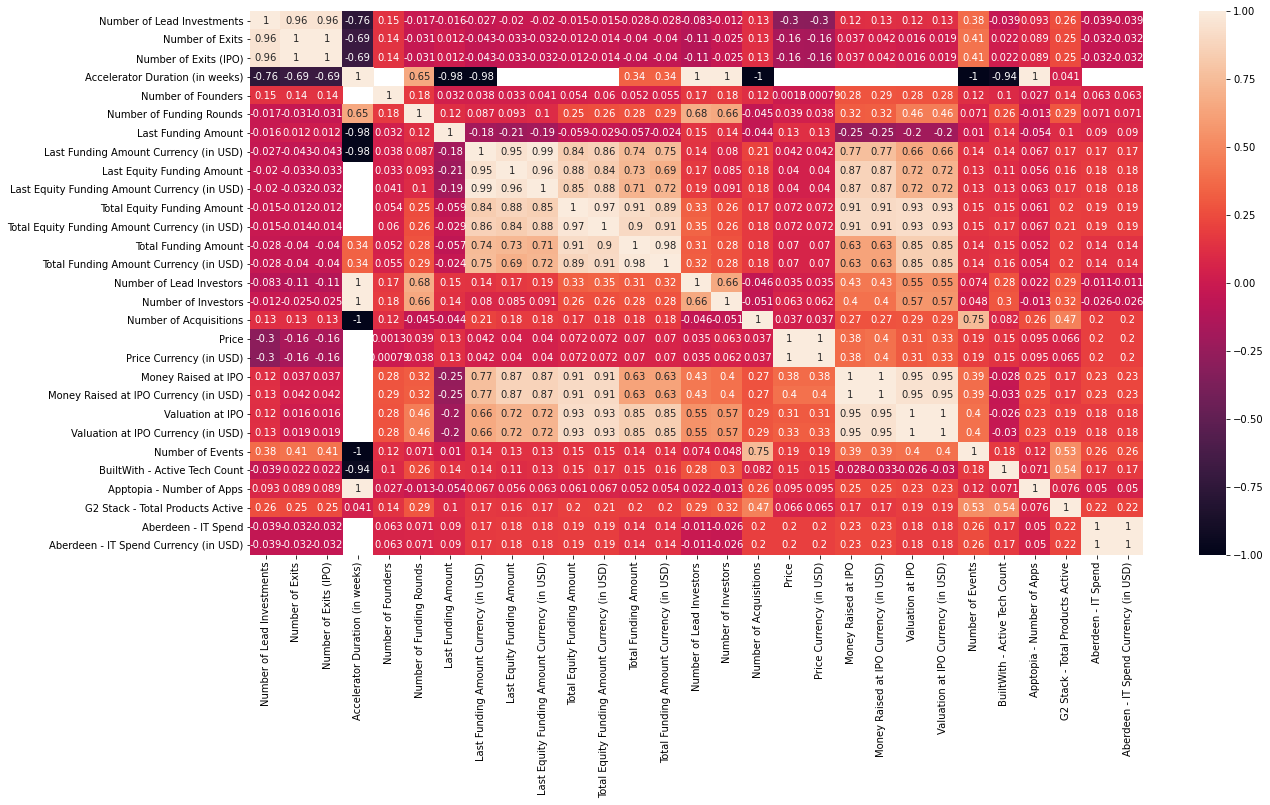

In [8]:
#sns.heatmap(dataframe_countries.corr(method='spearman'));
plt.subplots(figsize= (20,10))
sns.heatmap(dataframe_countries.corr(), annot=True) 

### Graficas

In [9]:
#dataframe_countries["Headquarters Location"].head(10).value_counts().plot(kind='bar', title='TOP CIUDADES POR CONCENTRACION EMPRESAS')
df = dataframe_countries.groupby("Headquarters Location")["Last Funding Amount"].sum().reset_index(name='sum')
df.sort_values(by=['sum'], inplace=True, ascending=False)
df = df.drop(df[df["Headquarters Location"] == ""].index)
df

,Headquarters Location,sum
674,"San Francisco, California, United States",2.335172e+10
531,"New York, New York, United States",1.917911e+10
67,"Berlin, Berlin, Germany",1.128456e+10
762,"Tel Aviv, Tel Aviv, Israel",8.887206e+09
89,"Bogotá, Distrito Especial, Colombia",8.233993e+09
...,...,...
668,"Salvador, Sao Paulo, Brazil",-2.128206e+09
43,"Baltimore, Maryland, United States",-2.141384e+09
398,"Lake Buena Vista, Florida, United States",-2.147484e+09
583,"Pittsburgh, Pennsylvania, United States",-2.147484e+09


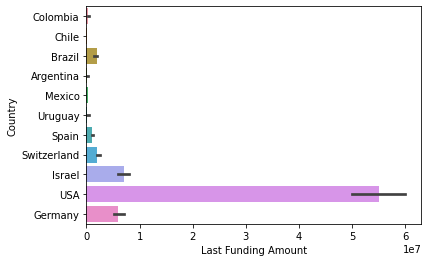

In [10]:
ax = sns.barplot(y="Country", x= "Last Funding Amount", data=dataframe_countries, estimator=np.median)

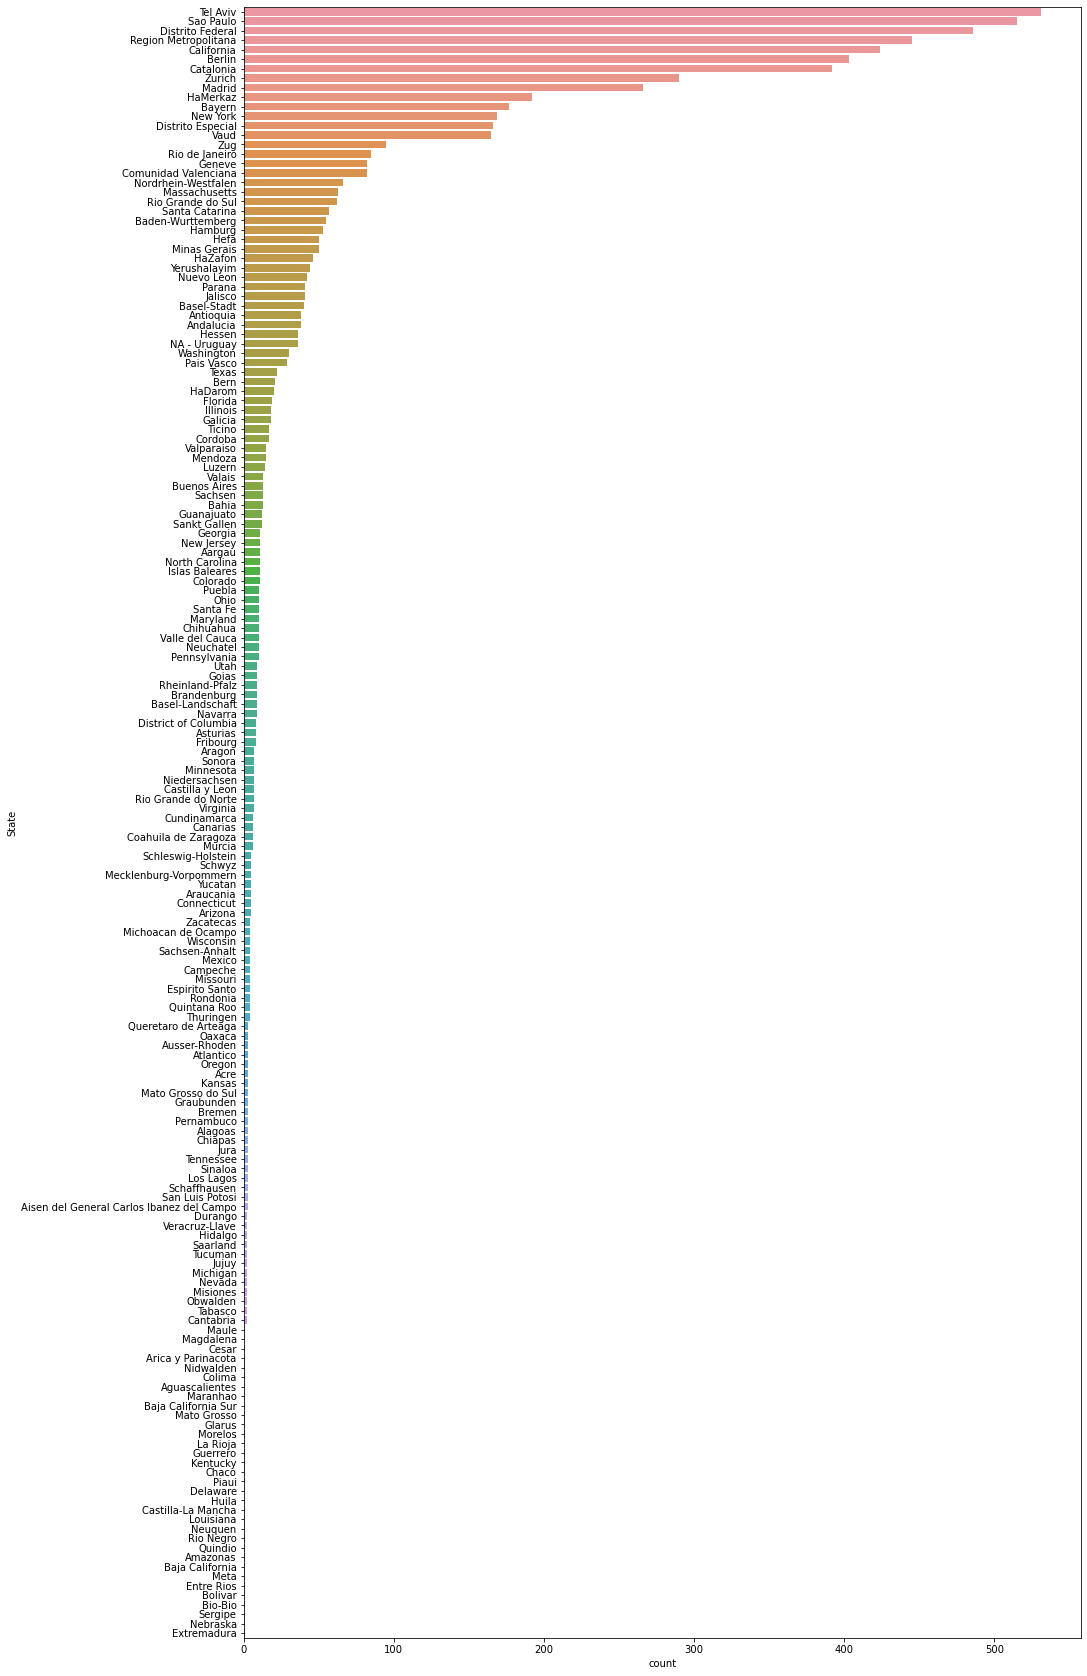

In [11]:
plt.subplots(figsize=(15,30))
countplot= sns.countplot(y= "State", data= dataframe_countries, order = dataframe_countries["State"].value_counts().index)

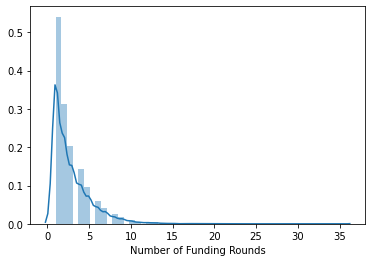

In [12]:
sns.distplot(dataframe_countries["Number of Funding Rounds"])

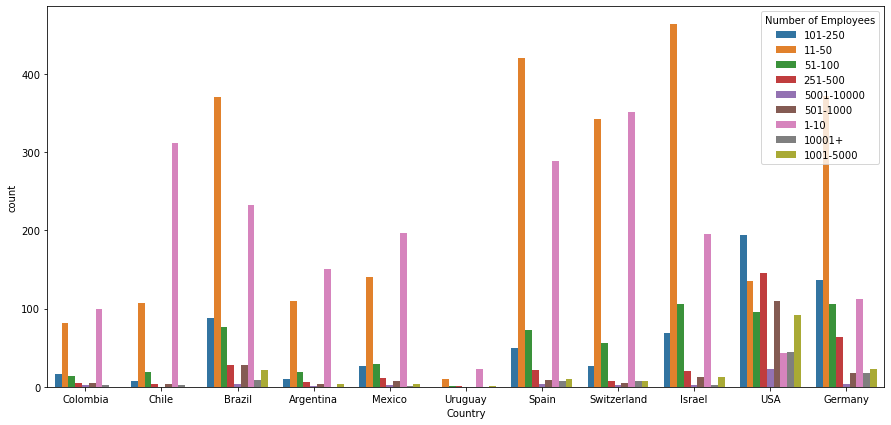

In [13]:
plt.subplots(figsize=(15,7))
sns.countplot(x="Country", hue="Number of Employees", data= dataframe_countries)
#pd.crosstab(dataframe_countries.Country,dataframe_countries["Number of Employees"]).plot(kind='bar')

# Export data

In [14]:
dataframe_countries.to_csv('.\\resources\\MixedCountriesCrunchBase.csv', index = False)